# Vehicle Insurance Claim  Fraud Detection

Dataset Overview

Dataset: Vehicle Insurance Claim Fraud Detection
Type: Binary Classification
Target Variable: FraudFound_P (0 = No Fraud, 1 = Fraud)
Row Count: ~15,400

**Real-World Context**

Insurance fraud results in significant financial losses for insurance companies. Detecting fraudulent claims early helps reduce financial risk and maintain fair premium pricing for genuine customers.

**Problem Statement**

The objective is to analyze and preprocess insurance claim data to predict whether a claim is fraudulent based on customer, vehicle, and claim-related features.

**Business Relevance**

Fraud detection systems help:

Minimize financial losses

Improve operational efficiency

Reduce investigation costs

Enhance risk assessment models




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("/content/fraud_oracle.csv")

print(df.shape)
df.head()
df.info()


(15420, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15

# Data Cleaning

Remove Identifier Columns

Identifier columns do not contribute predictive value and may introduce noise.

In [3]:
df = df.drop(columns=["PolicyNumber"], errors="ignore")


In [4]:
# Feature Type Classification
target = "FraudFound_P"

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

if target in numerical_cols:
    numerical_cols.remove(target)


In [5]:
# Missing value check

df.isnull().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [9]:
df.duplicated().sum()

np.int64(0)

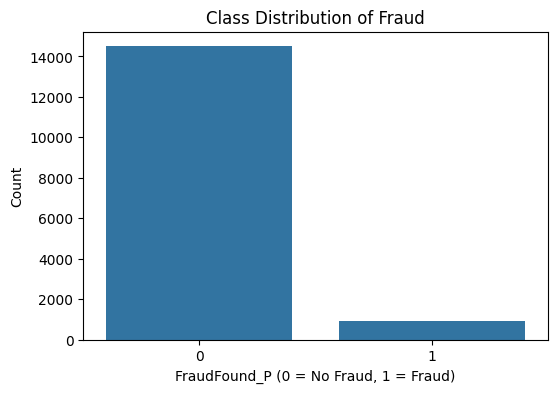

In [10]:
# Class Imbalance
plt.figure(figsize=(6,4))
sns.countplot(x="FraudFound_P", data=df)
plt.title("Class Distribution of Fraud")
plt.xlabel("FraudFound_P (0 = No Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


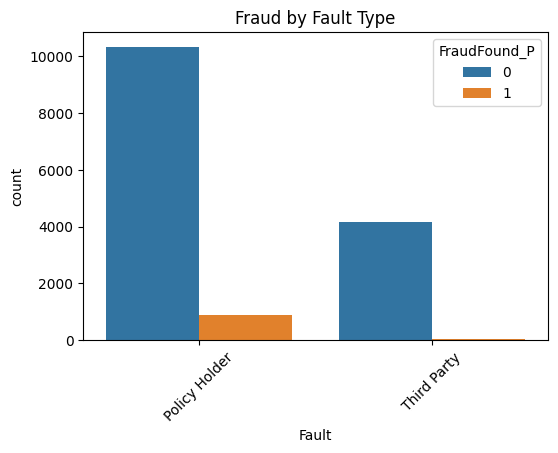

In [11]:
# Fraud rate by fault
plt.figure(figsize=(6,4))
sns.countplot(x="Fault", hue="FraudFound_P", data=df)
plt.title("Fraud by Fault Type")
plt.xticks(rotation=45)
plt.show()



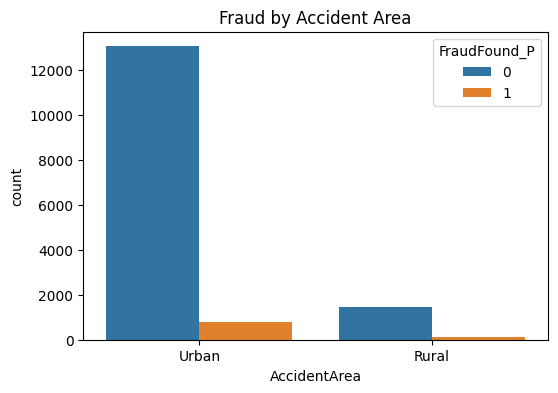

In [12]:
# Fraud rate by Accident Area
plt.figure(figsize=(6,4))
sns.countplot(x="AccidentArea", hue="FraudFound_P", data=df)
plt.title("Fraud by Accident Area")
plt.show()


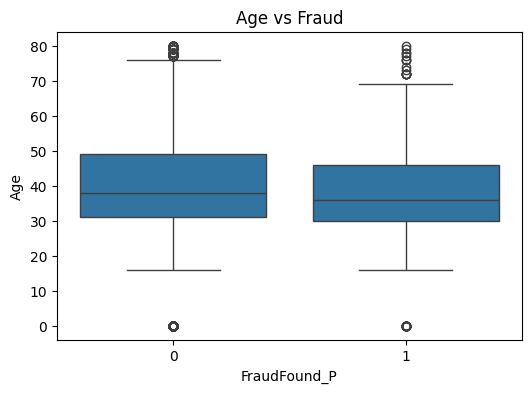

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="FraudFound_P", y="Age", data=df)
plt.title("Age vs Fraud")
plt.show()


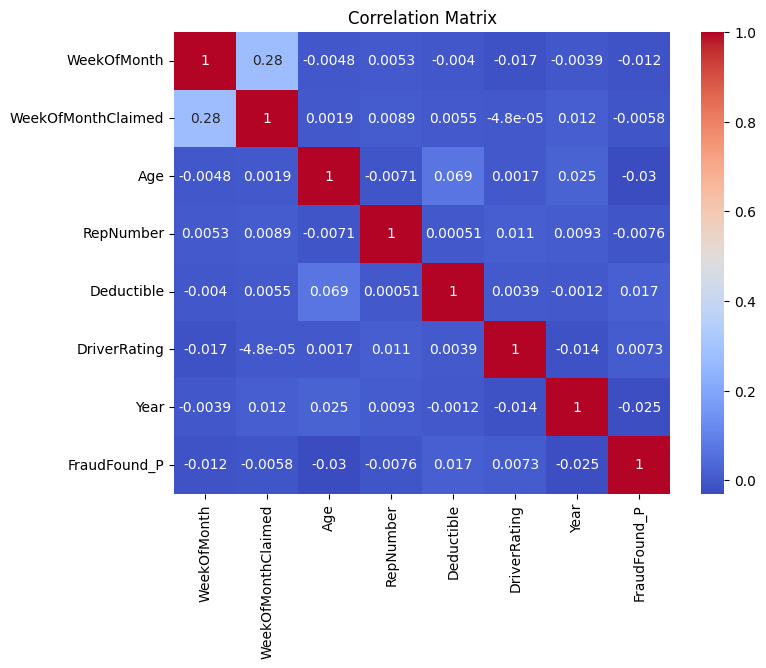

In [19]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols + [target]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [15]:
# Class imbalance analysis
df[target].value_counts(normalize=True) * 100


,proportion
FraudFound_P,
0,94.014267
1,5.985733


In [16]:
# Outlier Detection
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(col, "outlier percentage:",
          round(len(outliers)/len(df)*100, 2))


WeekOfMonth outlier percentage: 0.0
WeekOfMonthClaimed outlier percentage: 0.0
Age outlier percentage: 3.55
RepNumber outlier percentage: 0.0
Deductible outlier percentage: 3.77
DriverRating outlier percentage: 0.0
Year outlier percentage: 0.0


In [17]:
for col in categorical_cols:
    print(col, df[col].nunique())


Month 12
DayOfWeek 7
Make 19
AccidentArea 2
DayOfWeekClaimed 8
MonthClaimed 13
Sex 2
MaritalStatus 4
Fault 2
PolicyType 9
VehicleCategory 3
VehiclePrice 6
Days_Policy_Accident 5
Days_Policy_Claim 4
PastNumberOfClaims 4
AgeOfVehicle 8
AgeOfPolicyHolder 9
PoliceReportFiled 2
WitnessPresent 2
AgentType 2
NumberOfSuppliments 4
AddressChange_Claim 5
NumberOfCars 5
BasePolicy 3


In [18]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df.shape)


(15420, 124)


In [20]:
# Train-Test split
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [21]:
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


**Key Findings**

Certain claim attributes show stronger fraud association.

Fraud cases are less frequent than legitimate claims.

Some categorical features strongly influence fraud likelihood.

**Modeling Challenges**

Class imbalance

High number of categorical variables

Potential multicollinearity after encoding

**Feature Engineering Suggestions**

Create age bins

Combine vehicle-related features

Apply class-weighted models

Use ROC-AUC and Recall for evaluation


In [22]:
readme_content = """
# Vehicle Insurance Claim Fraud Detection
Data Preprocessing & Visualization

## Dataset Source
Vehicle Insurance Claim Fraud Detection Dataset
link:https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection
(Row count ~15,400)

---

## Problem Statement
The objective is to predict whether an insurance claim is fraudulent
based on customer, vehicle, and claim-related attributes.

Target Variable:
FraudFound_P
0 = No Fraud
1 = Fraud

This is a binary classification problem.

---

## Summary of Preprocessing Decisions

• Removed identifier columns that do not add predictive value.
• Checked class imbalance
• Applied One-Hot Encoding to categorical features.
• Performed train-test split before scaling to avoid data leakage.
• Standardized numerical features using StandardScaler.

---

## Key Insights & Observations

• Fraud cases represent a smaller proportion of total claims.
• Certain categorical features (e.g., Fault, AccidentArea) show noticeable fraud patterns.
• Numerical variables show some distribution differences between fraud and non-fraud cases.
• Accuracy alone is not sufficient due to class imbalance.

---

## Potential Next Modeling Steps

• Train Logistic Regression and Random Forest models.
• Use class weighting to handle imbalance.
• Evaluate using Recall, Precision, F1-score, and ROC-AUC.
• Focus on minimizing false negatives (missed fraud cases).
• Perform feature importance analysis.

---

## Modeling Consideration

In fraud detection, false negatives are more costly than false positives.
Therefore, Recall for the fraud class should be prioritized during model evaluation.
"""

with open("README.md", "w") as f:
    f.write(readme_content)

print("README.md file created successfully.")


README.md file created successfully.
